In [16]:
import sys
sys.path.append('../')
from ompl import base as ob
from ompl import geometric as og
from ompl import util as ou

from panav.environment.env import MultiTunnelEnv
from panav.viz import draw_env

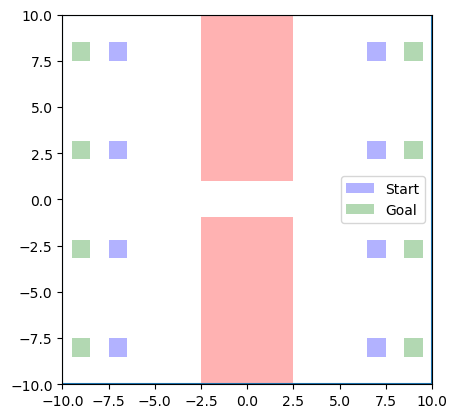

In [17]:
bloating_r = 0.5
vmax = 1.0

N = 8
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout

env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = N)
draw_env(env)

In [18]:
space_dim = 2
bounds = ob.RealVectorBounds(space_dim)

for axis in range(space_dim):
    bounds.setLow(axis,min(limits[axis]))
    bounds.setHigh(axis,max(limits[axis]))
    
space = ob.RealVectorStateSpace(space_dim)
space.setBounds(bounds)
spaceTime = ob.SpaceTimeStateSpace(space,vmax)

In [20]:
si = ob.SpaceInformation(spaceTime)


In [ ]:
import numpy as np
class ValidityChecker(ob.StateValidityChecker):
     # Returns whether the given state's position overlaps the
     # circular obstacle
     def isValid(self, state):
         return self.clearance(state) > 0.0
  
     # Returns the distance from the given state's position to the
     # boundary of the circular obstacle.
     def clearance(self, state):
         # Extract the robot's (x,y) position from its state
         x = state[0]
         y = state[1]
  
         # Distance formula between two points, offset by the circle's
         # radius
         return np.sqrt((x-0.5)*(x-0.5) + (y-0.5)*(y-0.5)) - 0.25
  
# Set the object used to check which states in the space are valid
validityChecker = ValidityChecker(si)
si.setStateValidityChecker(validityChecker)

In [ ]:
planner = og.STRRTstar(si)